# Breast Cancer with TensorFlow

In [182]:
# General
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data
import tensorflow_datasets as tfds

# Modeling
import tensorflow as tf
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report


In [183]:
# Random Seed
random_seed = 42 # set random seed for reproducibility
tf.random.set_seed(random_seed) # set random seed for TensorFlow
np.random.seed(random_seed) # set random seed for NumPy

## Data

In [184]:
df = pd.read_csv('/home/danielbudi/Collage/comp-gammafest/datasets/titanic_tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [185]:
target_column='Survived'

In [186]:
df['Sex'].replace(to_replace={'female':0, 'male':1}, inplace=True)
df['Embarked'].replace(to_replace={'C':0, 'Q':1, 'S':2}, inplace=True)
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [189]:
from sklearn.impute import KNNImputer

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Fit and transform the dataframe
knn_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
# y_train = np.array(df[target_column]) # value dari label
# df = df.drop(target_column, axis=1) # drop target
# feature_list = list(df.columns) # list column
# X_train = np.array(df) # df dalam bentuk numpy array

In [191]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(knn_df, target=target_column, train_size=0.8, valid_size=0.1, test_size=0.1)
# # X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(334, 7) (334,)
(42, 7) (42,)
(42, 7) (42,)


In [192]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

## Modeling

In [193]:
LEARNING_RATE = 2e-5
BATCH_SIZE = 16
EPOCHS = 20

In [218]:
tf.keras.backend.clear_session() # clean session
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # input layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(31, activation='relu'),
    # tf.keras.layers.Dense(15, activation='relu'),
    # tf.keras.layers.Dense(7, activation='relu'),
    # tf.keras.layers.Dense(3, activation='relu'),
    # tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation ='softmax'),
])

model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
            #   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              # loss=tf.keras.losses.BinaryCrossentropy(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 514       
                                                                 
Total params: 44,226
Trainable params: 44,226
Non-traina

In [219]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_valid,y_valid),
                    epochs=EPOCHS,
                    callbacks=[
                        EarlyStopping(patience=5, restore_best_weights=True),
                        ModelCheckpoint("model/titanic.h5", save_best_only=True)
                    ],
                    batch_size=BATCH_SIZE
                    )

Epoch 1/20
21/21 [==============================] - 1s 13ms/step - loss: 0.6795 - accuracy: 0.6257 - val_loss: 0.6834 - val_accuracy: 0.6190
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.6636 - accuracy: 0.6916 - val_loss: 0.6738 - val_accuracy: 0.6905
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.6632 - accuracy: 0.6856 - val_loss: 0.6644 - val_accuracy: 0.6667
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.6468 - accuracy: 0.7365 - val_loss: 0.6545 - val_accuracy: 0.6905
Epoch 5/20
21/21 [==============================] - 0s 8ms/step - loss: 0.6379 - accuracy: 0.7635 - val_loss: 0.6447 - val_accuracy: 0.6905
Epoch 6/20
21/21 [==============================] - 0s 9ms/step - loss: 0.6261 - accuracy: 0.7784 - val_loss: 0.6357 - val_accuracy: 0.6905
Epoch 7/20
21/21 [==============================] - 0s 9ms/step - loss: 0.6173 - accuracy: 0.7964 - val_loss: 0.6263 - val_accuracy: 0.6905
Epoch 8/20
21/21 [=

## Model Evaluation

In [220]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test Loss is {test_loss}')
print(f'Test Accuracy is {test_acc}')

2/2 [==============================] - 0s 5ms/step - loss: 0.4783 - accuracy: 0.8810
Test Loss is 0.47833171486854553
Test Accuracy is 0.8809523582458496


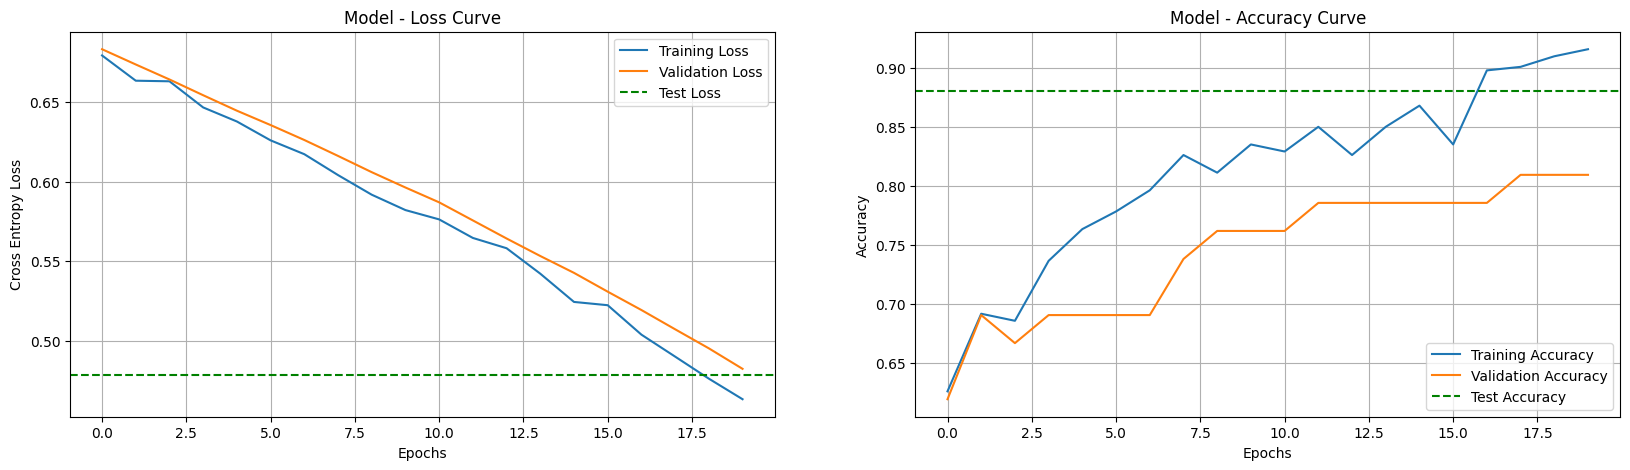

In [221]:
# Collect the history of the training run
history = pd.DataFrame(history.history)

# Create a figure to display the model's performance
plt.figure(figsize=(20, 5))

# Plot the loss curve in the first subplot
plt.subplot(1, 2, 1)
plt.title("Model - Loss Curve")
plt.plot(history['loss'], label="Training Loss")
plt.plot(history['val_loss'], label="Validation Loss")

# Horizontal line to show the testing performance
plt.axhline(y=test_loss, label="Test Loss", linestyle='--', color='green')

# Set the x- and y-labels, and the x- and y-limits
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
# plt.ylim([0, 0.4])

# Show the legend and grid
plt.legend()
plt.grid()

# Plot the accuracy curve in the second subplot
plt.subplot(1, 2, 2)
plt.title("Model - Accuracy Curve")
plt.plot(history['accuracy'], label="Training Accuracy")
plt.plot(history['val_accuracy'], label="Validation Accuracy")

# Horizontal line to show the testing performance
plt.axhline(y=test_acc, label="Test Accuracy", linestyle='--', color='green')

# Set the x- and y-labels, and the x- and y-limits
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
# plt.ylim([0.85, 1])

# Show the legend and grid
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [ ]:
predict=model.predict(X_test)

y_pred=[]
for i in range(len(predict)):
    y_pred.append(0 if predict[i] < 0.5 else 1)

2/2 [==============================] - 0s 5ms/step


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        26
         1.0       1.00      0.75      0.86        16

    accuracy                           0.90        42
   macro avg       0.93      0.88      0.89        42
weighted avg       0.92      0.90      0.90        42



2/2 [==============================] - 0s 5ms/step


Text(0.5, 36.72222222222221, 'Predicted label')

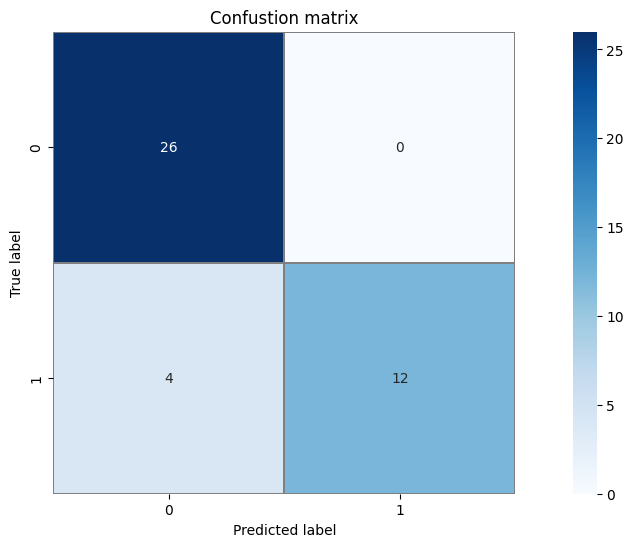

In [ ]:
p_test = model.predict(X_test).argmax(axis=1)
cm = tf.math.confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(cm, annot=True, cmap='Blues', square=True, linewidths=0.01, linecolor='grey')
plt.title('Confustion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')